<a href="https://colab.research.google.com/github/3saswat/Global-Terrorism-data-analysis/blob/main/saswat_ku_biswal_global_terrorism_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

##"The threatened or actual use of illegal force and violence by a non-state actor to attain a political, economic, religious, or social goal through fear, coercion, or intimidation." - Definition of Terrorism


###**Terrorist Activities Around The World**

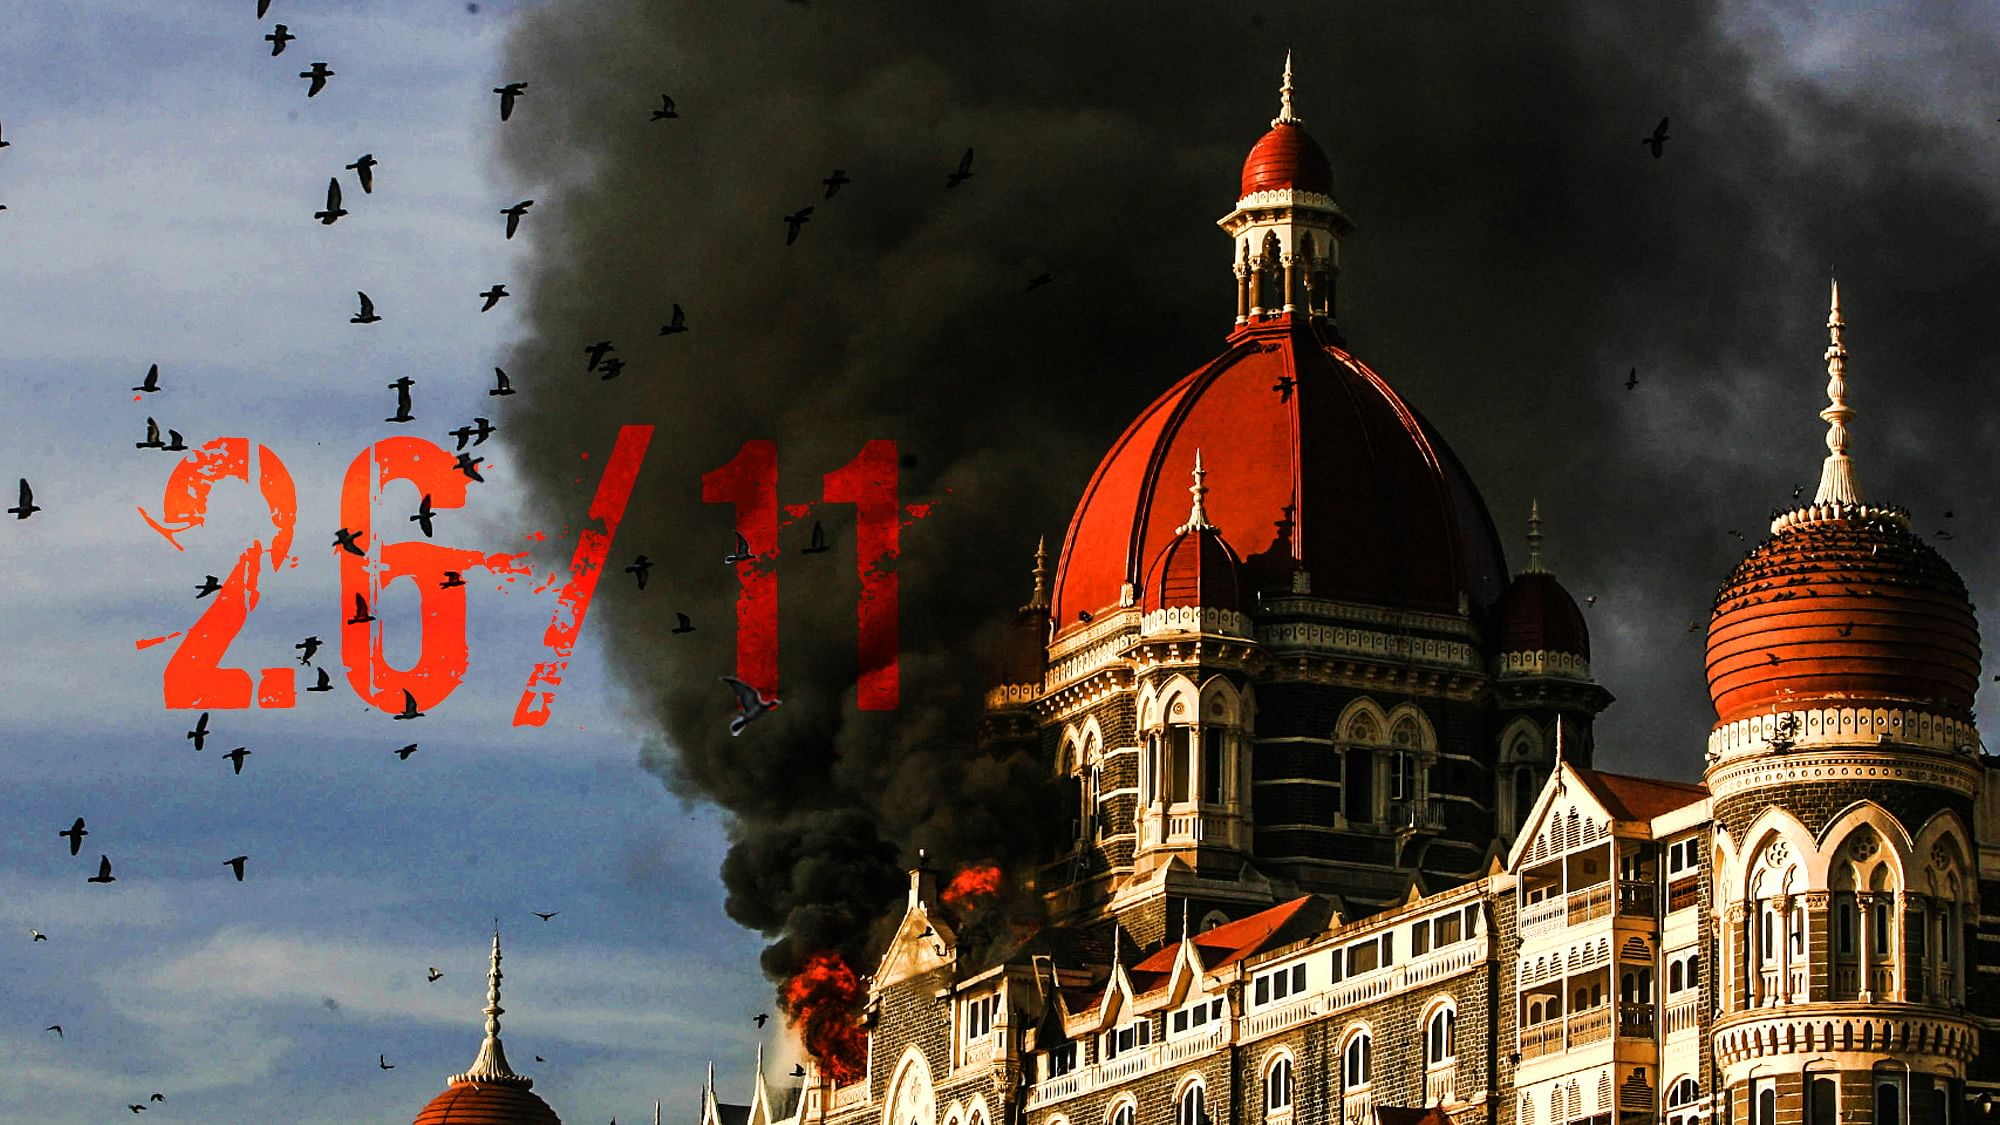

According to a survey, about 218 million people are affected by calamities, natural and man-made, per annum and about 68000 people loose their lives every year. The frequency of natural disasters like earthquakes, volcanoes etc have remained broadly constant, but the number of terrorist activities have grown over the period.

Terrorism implies the use of violence to terrorise a population or government for certain political, religious or ideological purpose. The threat of terrorism has become a worldwide concern with several parts of the world reeling under frequent terrorist strikes. With little concern for human lives, terrorists continue to strike with impunity, leaving a trail of death and destruction, wherever they choose to inflict their blows.

In this dataset, we will be exploring the terror attacks over the world from 1970-2017, finding the most affected countries, the most notorious groups, their motives,etc.


The main question I will try to answer with this Data Exploration is how relevant is this definition and details related to it with the data we have?

## Importing relevant libraries

In [ ]:
# importing relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
plt.style.use('fivethirtyeight')
import random

import plotly.graph_objects as go
import plotly.offline as py
py.init_notebook_mode(connected=True)

%matplotlib inline

warnings.filterwarnings('ignore')

sns.set(style = 'darkgrid') # setting style of facetgrid in seaborn

In [ ]:
# setting display options for dataframe
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 500)

## Import CSV file

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# reading file
df_terror = pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/EDA Project/Global Terrorism Data.csv",encoding='latin1')
df_terror.head()


eventid  iyear  imonth  iday approxdate  extended resolution  country         country_txt  region                   region_txt provstate           city   latitude   longitude  specificity  vicinity location summary  crit1  crit2  crit3  doubtterr  alternative alternative_txt  multiple  success  suicide  attacktype1                 attacktype1_txt  attacktype2 attacktype2_txt  attacktype3 attacktype3_txt  targtype1                targtype1_txt  targsubtype1  \
0  197000000001   1970       7     2        NaN         0        NaN       58  Dominican Republic       2  Central America & Caribbean       NaN  Santo Domingo  18.456792  -69.951164          1.0         0      NaN     NaN      1      1      1        0.0          NaN             NaN       0.0        1        0            1                   Assassination          NaN             NaN          NaN             NaN         14  Private Citizens & Property          68.0   
1  197000000002   1970       0     0        NaN         0        NaN      130              Mexico       1                North America   Federal    Mexico city  19.371887  -99.086624          1.0         0      NaN     NaN      1      1      1        0.0          NaN             NaN       0.0        1        0            6     Hostage Taking (Kidnapping)          NaN             NaN          NaN             NaN          7      Government (Diplomatic)          45.0   
2  197001000001   1970       1     0        NaN         0        NaN      160         Philippines       5               Southeast Asia    Tarlac        Unknown  15.478598  120.599741          4.0         0      NaN     NaN      1      1      1        0.0          NaN             NaN       0.0        1        0            1                   Assassination          NaN             NaN          NaN             NaN         10          Journalists & Media          54.0   
3  197001000002   1970       1     0        NaN         0        NaN       78              Greece       8               Western Europe    Attica         Athens  37.997490   23.762728          1.0         0      NaN     NaN      1      1      1        0.0          NaN             NaN       0.0        1        0            3               Bombing/Explosion          NaN             NaN          NaN             NaN          7      Government (Diplomatic)          46.0   
4  197001000003   1970       1     0        NaN         0        NaN      101               Japan       4                    East Asia   Fukouka        Fukouka  33.580412  130.396361          1.0         0      NaN     NaN      1      1      1       -9.0          NaN             NaN       0.0        1        0            7  Facility/Infrastructure Attack          NaN             NaN          NaN             NaN          7      Government (Diplomatic)          46.0   

                                    targsubtype1_txt                        corp1                  target1  natlty1         natlty1_txt  targtype2 targtype2_txt  targsubtype2 targsubtype2_txt corp2 target2  natlty2 natlty2_txt  targtype3 targtype3_txt  targsubtype3 targsubtype3_txt corp3 target3  natlty3 natlty3_txt                               gname gsubname gname2 gsubname2 gname3 gsubname3 motive  guncertain1  guncertain2  guncertain3  individual  nperps  nperpcap  claimed  claimmode  \
0                                     Named Civilian                          NaN             Julio Guzman     58.0  Dominican Republic        NaN           NaN           NaN              NaN   NaN     NaN      NaN         NaN        NaN           NaN           NaN              NaN   NaN     NaN      NaN         NaN                              MANO-D      NaN    NaN       NaN    NaN       NaN    NaN          0.0          NaN          NaN           0     NaN       NaN      NaN        NaN   
1  Diplomatic Personnel (outside of embassy, cons...  Belgian Ambassador Daughter  Nadine Chaval, daughter     21.0             Belgium        NaN           NaN           NaN         

In [ ]:
df_terror.shape

(181691, 135)

In [ ]:
#just to display columns as row-wise to look all columns at once
columns = df_terror.columns.tolist()         
print(columns)

['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended', 'resolution', 'country', 'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude', 'longitude', 'specificity', 'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3', 'doubtterr', 'alternative', 'alternative_txt', 'multiple', 'success', 'suicide', 'attacktype1', 'attacktype1_txt', 'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt', 'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt', 'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2', 'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2', 'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt', 'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3', 'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2', 'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2', 'guncertain3', 'individual', 'nperps', 'nperpcap', 'claimed', 'claimmode', 'claimmode_txt', 'claim2', 'claimmode2', 'claim

## Getting Data Ready

There are to many columns, I didn't count them yet. But important things are the columns. Therefore we should look the columns and check what are they.

In [ ]:
#now we don't need all 135 columns, we'll just select the important ones
df_terror.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country',
                       'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target',
                       'nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group',
                       'targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

df_terror = df_terror[['Year','Month','Day','Country','Region','city','latitude','longitude','AttackType',
               'Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]

df_terror['casualities']=df_terror['Killed']+df_terror['Wounded']
df_terror.head()

Year  Month  Day             Country                       Region           city   latitude   longitude                      AttackType  Killed  Wounded                   Target Summary                               Group                  Target_type Weapon_type Motive  casualities
0  1970      7    2  Dominican Republic  Central America & Caribbean  Santo Domingo  18.456792  -69.951164                   Assassination     1.0      0.0             Julio Guzman     NaN                              MANO-D  Private Citizens & Property     Unknown    NaN          1.0
1  1970      0    0              Mexico                North America    Mexico city  19.371887  -99.086624     Hostage Taking (Kidnapping)     0.0      0.0  Nadine Chaval, daughter     NaN  23rd of September Communist League      Government (Diplomatic)     Unknown    NaN          0.0
2  1970      1    0         Philippines               Southeast Asia        Unknown  15.478598  120.599741                   Assassination     1.0      0.0                 Employee     NaN                             Unknown          Journalists & Media     Unknown    NaN          1.0
3  1970      1    0              Greece               Western Europe         Athens  37.997490   23.762728               Bombing/Explosion     NaN      NaN             U.S. Embassy     NaN                             Unknown      Government (Diplomatic)  Explosives    NaN          NaN
4  1970      1    0               Japan                    East Asia        Fukouka  33.580412  130.396361  Facility/Infrastructure Attack     NaN      NaN           U.S. Consulate     NaN                             Unknown      Government (Diplomatic)  Incendiary    NaN          NaN

#Missing data

In [ ]:
# Checking the null velues in data
df_terror.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
Region              0
city              434
latitude         4556
longitude        4557
AttackType          0
Killed          10313
Wounded         16311
Target            636
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
casualities     16874
dtype: int64



There is a significant amount of missing information. For example, there are 4557 missing longitude values, 4556 missing latitude values, 434 city values etc.

In [ ]:
df_terror.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   Region       181691 non-null  object 
 5   city         181257 non-null  object 
 6   latitude     177135 non-null  float64
 7   longitude    177134 non-null  float64
 8   AttackType   181691 non-null  object 
 9   Killed       171378 non-null  float64
 10  Wounded      165380 non-null  float64
 11  Target       181055 non-null  object 
 12  Summary      115562 non-null  object 
 13  Group        181691 non-null  object 
 14  Target_type  181691 non-null  object 
 15  Weapon_type  181691 non-null  object 
 16  Motive       50561 non-null   object 
 17  casualities  164817 non-null  float64
dtypes: float64(5), int64(3),

## Some Analysis

Here some major terrorist attacks happened in the past.

In [ ]:
print('Country with Highest Terrorist Attacks:',df_terror['Country'].value_counts().index[0])
print('Regions with Highest Terrorist Attacks:',df_terror['Region'].value_counts().index[0])
print('Maximum people killed in an attack are:',df_terror['Killed'].max(),'that took place in',df_terror.loc[df_terror['Killed'].idxmax()].Country)
print('City with the most attacks:',df_terror['city'].value_counts().index[1])
print('Year with the most attacks:',df_terror['Year'].value_counts().idxmax())
print('Month with the most attacks:',df_terror['Month'].value_counts().idxmax())
print('Group with the most attacks:',df_terror['Group'].value_counts().index[1])
print('Most Attack Types:',df_terror['AttackType'].value_counts().idxmax())

Country with Highest Terrorist Attacks: Iraq
Regions with Highest Terrorist Attacks: Middle East & North Africa
Maximum people killed in an attack are: 1570.0 that took place in Iraq
City with the most attacks: Baghdad
Year with the most attacks: 2014
Month with the most attacks: 5
Group with the most attacks: Taliban
Most Attack Types: Bombing/Explosion


## Data Visualization

#-> Number of Terrorist Activities each Year

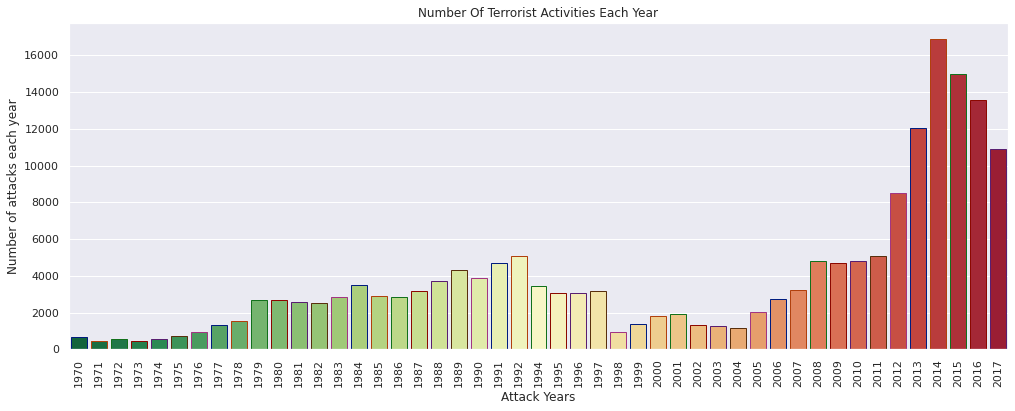

In [ ]:
#Count plot
plt.subplots(figsize=(15,6))
sns.countplot('Year',data=df_terror,palette='RdYlGn_r',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year')
plt.xlabel("Attack Years")
plt.ylabel("Number of attacks each year")
plt.show()

In [ ]:
df_terror['Year'].value_counts(dropna=False).sort_index()

1970      651
1971      471
1972      568
1973      473
1974      581
1975      740
1976      923
1977     1319
1978     1526
1979     2662
1980     2662
1981     2586
1982     2544
1983     2870
1984     3495
1985     2915
1986     2860
1987     3183
1988     3721
1989     4324
1990     3887
1991     4683
1992     5071
1994     3456
1995     3081
1996     3058
1997     3197
1998      934
1999     1395
2000     1814
2001     1906
2002     1333
2003     1278
2004     1166
2005     2017
2006     2758
2007     3242
2008     4805
2009     4721
2010     4826
2011     5076
2012     8522
2013    12036
2014    16903
2015    14965
2016    13587
2017    10900
Name: Year, dtype: int64

The data shows clearly that the number of terrorist activities have gone up sharply after 2000.

#-> Terrorist Activities by Region in each Year through Area Plot


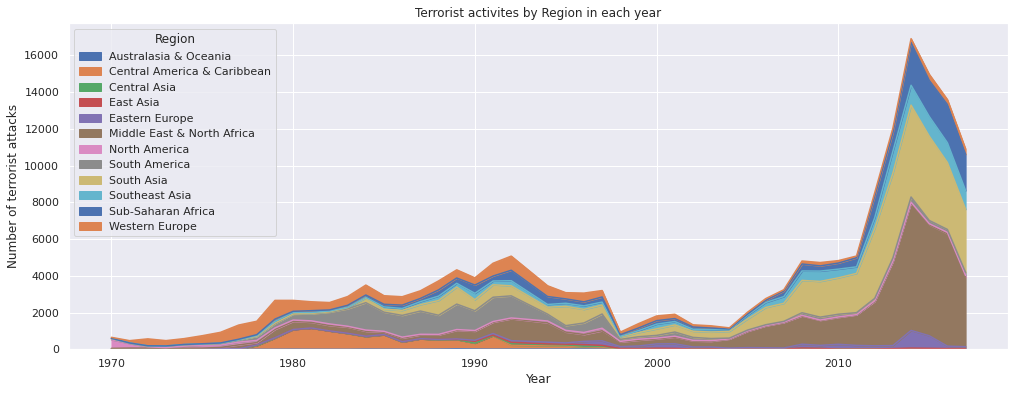

In [ ]:
#Area plot
pd.crosstab(df_terror.Year,df_terror.Region).plot(kind='area',figsize=(15,6))
plt.title('Terrorist activites by Region in each year')
plt.ylabel("Number of terrorist attacks")
plt.show()

As seen already, Middle East and North Africa are the most terrorism prone regions followed by South Asia

#-> Most affected countries

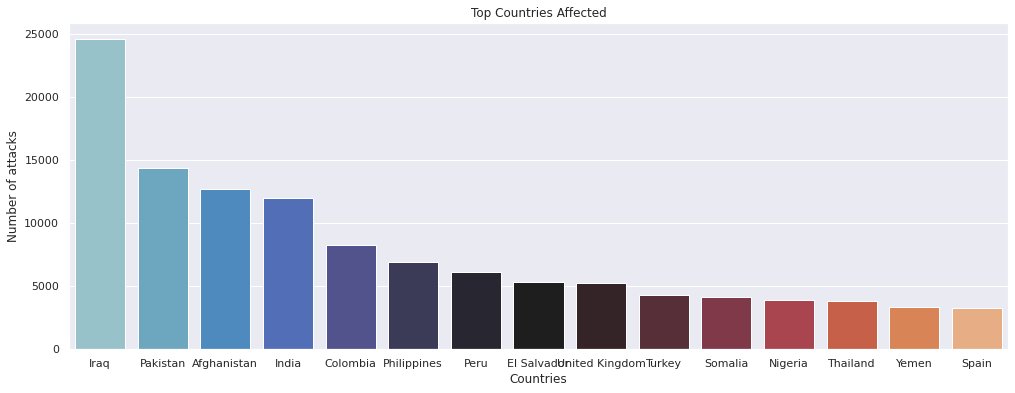

In [ ]:
#Bar plot
plt.subplots(figsize=(15,6))
sns.barplot(df_terror['Country'].value_counts()[:15].index,df_terror['Country'].value_counts()[:15].values,palette='icefire')
plt.title('Top Countries Affected')
plt.xlabel('Countries')
plt.ylabel('Number of attacks')
plt.show()


In [ ]:
attack_country = df_terror.Country.value_counts()[:15]
attack_country

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Somalia            4142
Nigeria            3907
Thailand           3849
Yemen              3347
Spain              3249
Name: Country, dtype: int64

If we look now to the country split, we see that there are few countries where the number of people killed in terrorist attacks is very large. Some of them have experienced recent massive increase, like Iraq and Pakistan and Afganistan while others have a long history, like India, Colombia, Philippines, Peru.

# ->Attack Types

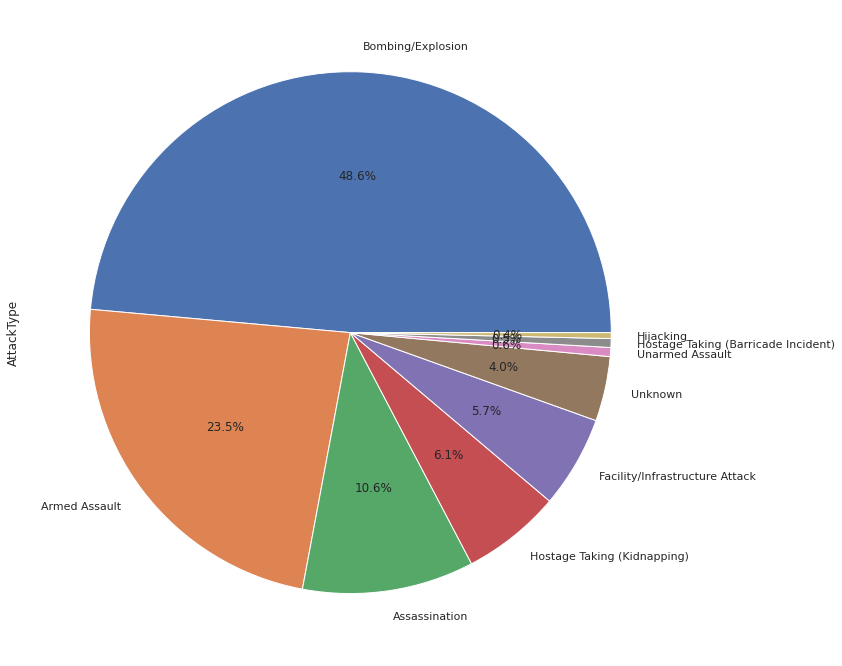

In [ ]:
# Pie Plot of AttackTypes
plt.figure(figsize=(12,12))
df_terror['AttackType'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

We can observe that Bombing/Explosion was always the most frequent type of attack, followed by Armed Assault. In recent years, the number of such events increased dramatically, accounting for the majority of the events in recent years.

# ->AttackType vs Region

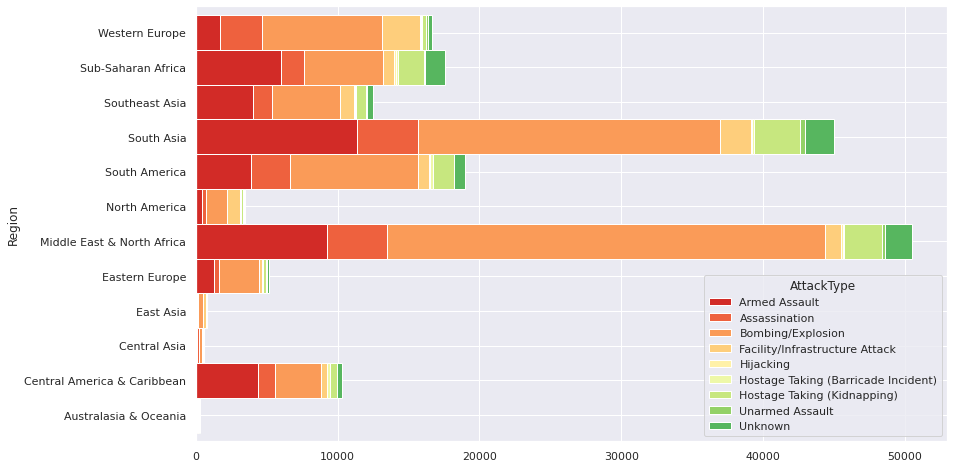

In [ ]:
#Crosstab Bar Plot
pd.crosstab(df_terror.Region,df_terror.AttackType).plot.barh(stacked=True,width=1,color=sns.color_palette('RdYlGn',10))
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.show()

Above figure shows Bombing/Explosion and Armed Assault is the most favourite attack type of the terrorist groups. This type of attack mostly happed in Middle East & North Africa and also follwed by South Asia.

In [ ]:
#Terrorist group names and killed by each group
group_killed= df_terror[['Group','Killed']].groupby(['Group'],axis=0).sum().sort_values('Killed', ascending=False).head(10)
group_killed

Killed
Group                                                     
Unknown                                           112367.0
Islamic State of Iraq and the Levant (ISIL)        38923.0
Taliban                                            29410.0
Boko Haram                                         20328.0
Shining Path (SL)                                  11601.0
Liberation Tigers of Tamil Eelam (LTTE)            10989.0
Al-Shabaab                                          9330.0
Farabundo Marti National Liberation Front (FMLN)    8065.0
Nicaraguan Democratic Force (FDN)                   6662.0
Tehrik-i-Taliban Pakistan (TTP)                     6042.0

In this above information shows, unknown groups killed highest number of civillian in the past followed by ISIL and Taliban.

#->Terrorist Attacks of a Particular year and their Locations
Let's look at the terrorist acts in the world over a certain year.





In [ ]:
import folium
from folium.plugins import MarkerCluster 
filterYear = df_terror['Year'] == 2008

In [ ]:
filterData = df_terror[filterYear]        #filter data
reqFilterData = filterData.loc[:,'city':'longitude']
reqFilterData = reqFilterData.dropna()  #drop NaN values in latitude and longitude
reqFilterDataList = reqFilterData.values.tolist()  #reqFilterDataList

In [ ]:
map = folium.Map(location = [0, 30], tiles='CartoDB positron', zoom_start=2)
# clustered marker
markerCluster = folium.plugins.MarkerCluster().add_to(map)
for point in range(0, len(reqFilterDataList)):
    folium.Marker(location=[reqFilterDataList[point][1],reqFilterDataList[point][2]],
                  popup = reqFilterDataList[point][0]).add_to(markerCluster)
map

80% of the terrorist attacks in 2008 were carried out Southeast Asia and Middle East. In 2008, Mumbai terrorist attack also carried out.

#->Top 50 worst terror attacks

In [39]:
worst_attack = df_terror.sort_values(by='casualities',ascending=False)[:50]

In [ ]:
heat=worst_attack.pivot_table(index='Country',columns='Year',values='casualities')
heat.fillna(0,inplace=True)
heat.head(10)

Year          1978   1982  1984  1987   1992  1994  1995  1996   1997  1998   2001  2004   2005    2006        2007    2008   2009  2012  2013   2014   2015        2016   2017
Country                                                                                                                                                                        
Afghanistan    0.0    0.0   0.0   0.0    0.0   0.0   0.0   0.0    0.0   0.0    0.0   0.0    0.0     0.0    0.000000     0.0    0.0   0.0   0.0    0.0  536.0    0.000000  584.0
Algeria        0.0    0.0   0.0   0.0    0.0   0.0   0.0   0.0  450.0   0.0    0.0   0.0    0.0     0.0    0.000000     0.0    0.0   0.0   0.0    0.0    0.0    0.000000    0.0
Angola         0.0    0.0   0.0   0.0    0.0   0.0   0.0   0.0    0.0   0.0  419.0   0.0    0.0     0.0    0.000000     0.0    0.0   0.0   0.0    0.0    0.0    0.000000    0.0
Chad           0.0    0.0   0.0   0.0    0.0   0.0   0.0   0.0    0.0   0.0    0.0   0.0    0.0     0.0    0.000000  1161.0    0.0   0.0   0.0    0.0    0.0    0.000000    0.0
Egypt          0.0    0.0   0.0   0.0    0.0   0.0   0.0   0.0    0.0   0.0    0.0   0.0    0.0     0.0    0.000000     0.0    0.0   0.0   0.0    0.0    0.0    0.000000  438.0
Ethiopia       0.0    0.0   0.0   0.0  500.0   0.0   0.0   0.0    0.0   0.0    0.0   0.0    0.0     0.0    0.000000     0.0    0.0   0.0   0.0    0.0    0.0    0.000000    0.0
France         0.0    0.0   0.0   0.0    0.0   0.0   0.0   0.0    0.0   0.0    0.0   0.0    0.0     0.0    0.000000     0.0    0.0   0.0   0.0    0.0    0.0  520.000000    0.0
India          0.0    0.0   0.0   0.0    0.0   0.0   0.0   0.0    0.0   0.0    0.0   0.0    0.0  1005.0    0.000000     0.0    0.0   0.0   0.0    0.0    0.0    0.000000    0.0
Iran         422.0  760.0   0.0   0.0    0.0   0.0   0.0   0.0    0.0   0.0    0.0   0.0    0.0     0.0    0.000000     0.0    0.0   0.0   0.0    0.0    0.0    0.000000    0.0
Iraq           0.0    0.0   0.0   0.0    0.0   0.0   0.0   0.0    0.0   0.0    0.0   0.0  702.0   462.0  833.333333     0.0  509.0   0.0   0.0  670.0    0.0  911.666667    0.0

In [38]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
colorscale = [[0, '#edf8fb'], [.3, '#00BFFF'],  [.6, '#8856a7'],  [1, '#810f7c']]
heatmap = go.Heatmap(z=heat.values, x=heat.columns, y=heat.index, colorscale=colorscale)
data = [heatmap]
layout = go.Layout(
    title='Top 40 Worst Terror Attacks in History from 1982 to 2016',
    xaxis = dict(ticks='', nticks=20),
    yaxis = dict(ticks='')
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='heatmap',show_link=False)